In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = np.loadtxt("/content/P1_5.txt")
df = pd.DataFrame(data)
df = df.drop(columns=1)


In [ ]:
df.head()

,0,2,3,4,5,6,7,8,9,10,...,145,146,147,148,149,150,151,152,153,154
0,1.0,6.778645,5.554810,4.935933,5.639114,6.603463,6.309278,4.738829,3.110043,2.167682,...,0.129900,-0.609716,-0.822197,-0.109120,0.899585,1.374105,1.187913,0.742605,0.347446,0.131211
1,1.0,-0.354725,-0.210143,-0.337065,-0.613978,-0.725109,-0.509282,-0.154146,0.062651,0.102172,...,-0.468649,-0.052648,0.544180,0.781654,0.833143,1.253793,1.914558,2.013101,1.287430,0.521264
2,1.0,1.727716,2.056163,1.876898,0.992565,0.224456,0.429907,1.229387,1.403841,0.507216,...,-0.365350,-0.827163,0.208835,1.473647,1.545710,0.672175,0.097850,0.288585,0.679454,0.822155
3,1.0,1.064721,1.299112,0.705400,0.422355,1.269587,2.672225,3.240471,2.234018,0.275905,...,0.026794,-0.726883,-0.768780,-0.600054,-0.948638,-1.688718,-1.858080,-0.862087,0.660512,1.426284
4,1.0,-0.010284,-0.097968,-0.345274,-0.216691,0.351261,0.781839,0.695825,0.298840,-0.198690,...,1.946469,0.730151,-0.396311,-0.324040,0.629645,1.199808,0.600917,-0.806892,-2.087005,-2.579933


## 1. Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

##### Accuracy with imbalanced sample #####
print("----- Imbalanced sample -----")
x = df.iloc[:, 1:]  # Skip the first column (column 0) and start from the second column (column 1)
y = df.iloc[:, 0]
kf = StratifiedKFold(n_splits=5, shuffle=True)
clf = SVC(kernel='linear')
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    # Training phase
    x_train = x.iloc[train_index, :]
    y_train = y.iloc[train_index]
    clf.fit(x_train, y_train)

    # Test phase
    x_test = x.iloc[test_index, :]
    y_test = y.iloc[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


----- Imbalanced sample -----
              precision    recall  f1-score   support

         1.0       0.72      0.62      0.67       281
         2.0       0.94      0.96      0.95      1689

    accuracy                           0.91      1970
   macro avg       0.83      0.79      0.81      1970
weighted avg       0.91      0.91      0.91      1970



In [ ]:
print("----- Subsampling -----")
clf = SVC(kernel='linear')
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    # Training phase
    x_train = x.iloc[train_index, :]
    y_train = y.iloc[train_index]

    # Subsample the majority class to balance the data
    x1 = x_train[y_train == 1]
    y1 = y_train[y_train == 1]
    n1 = len(y1)
    x2 = x_train[y_train == 2]
    y2 = y_train[y_train == 2]
    n2 = len(y2)

    # Randomly select a subset of the majority class
    ind = random.sample(range(n2), n1)
    x_sub = pd.concat([x1, x2.iloc[ind, :]], axis=0)
    y_sub = pd.concat([y1, y2.iloc[ind]], axis=0)

    clf.fit(x_sub, y_sub)

    # Test phase
    x_test = x.iloc[test_index, :]
    y_test = y.iloc[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

##### Accuracy with balanced sample (Upsampling) #####
print("----- Upsampling -----")
clf = SVC(kernel='linear')
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    # Training phase
    x_train = x.iloc[train_index, :]
    y_train = y.iloc[train_index]

    # Upsample the minority class to balance the data
    x1 = x_train[y_train == 1]
    y1 = y_train[y_train == 1]
    n1 = len(y1)
    x2 = x_train[y_train == 2]
    y2 = y_train[y_train == 2]
    n2 = len(y2)

    # Randomly select with replacement from the minority class to match the majority class
    ind = random.choices(range(n1), k=n2)
    x_sub = pd.concat([x1.iloc[ind, :], x2], axis=0)
    y_sub = pd.concat([y1.iloc[ind], y2], axis=0)

    clf.fit(x_sub, y_sub)

    # Test phase
    x_test = x.iloc[test_index, :]
    y_test = y.iloc[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

##### Accuracy with balanced sample (weighted loss function) #####
print("----- Weighted loss function -----")
x = df.iloc[:, 1:]  # Reset x to include all features
y = df.iloc[:, 0]
clf = SVC(kernel='linear', class_weight='balanced')
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    # Training phase
    x_train = x.iloc[train_index, :]
    y_train = y.iloc[train_index]
    clf.fit(x_train, y_train)

    # Test phase
    x_test = x.iloc[test_index, :]
    y_test = y.iloc[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Subsampling -----
              precision    recall  f1-score   support

         1.0       0.46      0.84      0.59       281
         2.0       0.97      0.84      0.90      1689

    accuracy                           0.84      1970
   macro avg       0.72      0.84      0.75      1970
weighted avg       0.90      0.84      0.86      1970

----- Upsampling -----
              precision    recall  f1-score   support

         1.0       0.51      0.80      0.62       281
         2.0       0.96      0.87      0.91      1689

    accuracy                           0.86      1970
   macro avg       0.74      0.84      0.77      1970
weighted avg       0.90      0.86      0.87      1970

----- Weighted loss function -----
              precision    recall  f1-score   support

         1.0       0.56      0.81      0.66       281
         2.0       0.97      0.89      0.93      1689

    accuracy                           0.88      1970
   macro avg       0.76      0.85      0.79   

Dado los resultados no creo necesario balancear los datos

## 2. Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

In [ ]:
df.iloc[:, 0].unique()

array([1., 2.])

In [ ]:
features = df.columns
n_features = len(features)

In [ ]:
# Linear SVM
print('----- Linear-SVM -----')
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x.iloc[train_index]  # Use DataFrame indexing
    y_train = y.iloc[train_index]  # Use DataFrame indexing
    x_test = x.iloc[test_index]    # Use DataFrame indexing
    y_test = y.iloc[test_index]    # Use DataFrame indexing

    clf = SVC(kernel='linear')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


----- Linear-SVM -----
              precision    recall  f1-score   support

         1.0       0.76      0.65      0.70       281
         2.0       0.94      0.97      0.95      1689

    accuracy                           0.92      1970
   macro avg       0.85      0.81      0.83      1970
weighted avg       0.92      0.92      0.92      1970



In [ ]:
# RBF SVM
print('----- RBF-SVM -----')
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]

    clf = SVC(kernel='rbf')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


----- RBF-SVM -----
              precision    recall  f1-score   support

         1.0       0.90      0.58      0.70       281
         2.0       0.93      0.99      0.96      1689

    accuracy                           0.93      1970
   macro avg       0.91      0.78      0.83      1970
weighted avg       0.93      0.93      0.92      1970



In [ ]:
# KNN
print('----- KNN -----')
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]

    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


----- KNN -----
              precision    recall  f1-score   support

         1.0       0.69      0.36      0.48       281
         2.0       0.90      0.97      0.94      1689

    accuracy                           0.89      1970
   macro avg       0.80      0.67      0.71      1970
weighted avg       0.87      0.89      0.87      1970



In [ ]:
# Decision tree
print('----- Decision tree -----')
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]

    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


----- Decision tree -----
              precision    recall  f1-score   support

         1.0       0.41      0.42      0.42       281
         2.0       0.90      0.90      0.90      1689

    accuracy                           0.83      1970
   macro avg       0.66      0.66      0.66      1970
weighted avg       0.83      0.83      0.83      1970



In [ ]:
# Linear Discriminant Analysis
print('----- Linear Discriminant Analysis -----')
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]

    clf = LinearDiscriminantAnalysis()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


----- Linear Discriminant Analysis -----
              precision    recall  f1-score   support

         1.0       0.75      0.62      0.68       281
         2.0       0.94      0.97      0.95      1689

    accuracy                           0.92      1970
   macro avg       0.85      0.79      0.82      1970
weighted avg       0.91      0.92      0.91      1970



In [ ]:
print(df.shape)
print(df.head())

(1970, 154)
   0         2         3         4         5         6         7         8    \
0  1.0  6.778645  5.554810  4.935933  5.639114  6.603463  6.309278  4.738829   
1  1.0 -0.354725 -0.210143 -0.337065 -0.613978 -0.725109 -0.509282 -0.154146   
2  1.0  1.727716  2.056163  1.876898  0.992565  0.224456  0.429907  1.229387   
3  1.0  1.064721  1.299112  0.705400  0.422355  1.269587  2.672225  3.240471   
4  1.0 -0.010284 -0.097968 -0.345274 -0.216691  0.351261  0.781839  0.695825   

        9         10   ...       145       146       147       148       149  \
0  3.110043  2.167682  ...  0.129900 -0.609716 -0.822197 -0.109120  0.899585   
1  0.062651  0.102172  ... -0.468649 -0.052648  0.544180  0.781654  0.833143   
2  1.403841  0.507216  ... -0.365350 -0.827163  0.208835  1.473647  1.545710   
3  2.234018  0.275905  ...  0.026794 -0.726883 -0.768780 -0.600054 -0.948638   
4  0.298840 -0.198690  ...  1.946469  0.730151 -0.396311 -0.324040  0.629645   

        150       151     

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


# Lista para almacenar las métricas de evaluación
metricas = []
cv_y_test = []  # Lista para almacenar las etiquetas de prueba
cv_y_pred = []  # Lista para almacenar las etiquetas predichas

# Rango de números de predictores a probar
num_predictores_range = range(1, x.shape[1] + 1)

for num_predictores in num_predictores_range:
    # Utilizar SelectKBest para seleccionar las mejores características
    selector = SelectKBest(score_func=f_regression, k=num_predictores)
    X_selected = selector.fit_transform(x, y)

    modelo = LinearRegression()

    # Calculamos r^2 utilizando validación cruzada
    puntuaciones = cross_val_score(modelo, X_selected, y, cv=5, scoring='r2')

    metricas.append(puntuaciones.mean())

    # Dividir los datos en conjuntos de entrenamiento y prueba para cada iteración de CV
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Estandarizar las características (opcional pero recomendado)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Crear y entrenar el modelo de regresión logística
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Almacenar las etiquetas de prueba y predichas en cada iteración
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

# Número óptimo de predictores
num_predictores_optimos = num_predictores_range[metricas.index(max(metricas))]

print(f"Número óptimo de predictores: {num_predictores_optimos}")

# Nombres de las columnas seleccionadas
columnas_seleccionadas = x.columns[selector.get_support()]
print("Nombres de las columnas seleccionadas:")
print(columnas_seleccionadas)

X_optimo = x.iloc[:, :num_predictores_optimos]

# Calcular la precisión y generar el informe de clasificación utilizando los resultados de CV
cv_y_test_concat = np.concatenate(cv_y_test)
cv_y_pred_concat = np.concatenate(cv_y_pred)
accuracy = accuracy_score(cv_y_test_concat, cv_y_pred_concat)
report = classification_report(cv_y_test_concat, cv_y_pred_concat)

print("Precisión del modelo:", accuracy)
print(report)



## 3. Implementa desde cero el método de regresión logística, y evalúalo con el conjunto de datos.


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, y, y_pred):
        m = len(y)
        return (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)

        for _ in range(self.num_iterations):
            z = np.dot(X, self.theta)
            y_pred = self.sigmoid(z)
            gradient = np.dot(X.T, (y_pred - y)) / m
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        z = np.dot(X, self.theta)
        y_pred = self.sigmoid(z)
        return (y_pred >= 0.5).astype(int)

X = x

# Crear un modelo de regresión logística personalizado
model = LogisticRegression(learning_rate=0.1, num_iterations=1000)

# Entrenar el modelo
model.fit(X, y)

# Realizar predicciones
y_pred = model.predict(X)

# Calcular la precisión usando una formla que te calucla manualmente el accuracy, en ves de usar accuracy_score function
accuracy = np.mean(y_pred == y)
print("Precisión del modelo personalizado:", accuracy)


Precisión del modelo personalizado: 0.09695431472081219


## 4. Con alguno de los clasificadores que probaste en los pasos anteriores, determina el número óptimo de características utilizando un método tipo Filter.


Selected features:  ['x0' 'x1' 'x8' 'x9' 'x10' 'x11' 'x12' 'x14' 'x15' 'x23' 'x24' 'x25' 'x26'
 'x27' 'x28' 'x29' 'x38' 'x39' 'x40' 'x42' 'x46' 'x47' 'x48' 'x59' 'x61'
 'x62' 'x63' 'x65' 'x66' 'x67' 'x69' 'x70' 'x71' 'x72' 'x73' 'x74' 'x75'
 'x76' 'x77' 'x78' 'x79' 'x80' 'x84' 'x85' 'x86' 'x87' 'x88' 'x89' 'x90'
 'x91' 'x92' 'x93' 'x94' 'x95' 'x96' 'x97' 'x101' 'x109' 'x110' 'x111'
 'x113' 'x114' 'x115' 'x119' 'x120' 'x121' 'x122' 'x126' 'x127' 'x128'
 'x133' 'x134' 'x136' 'x137' 'x138' 'x140' 'x147' 'x150' 'x151' 'x152']
              precision    recall  f1-score   support

         1.0       0.73      0.23      0.35        48
         2.0       0.90      0.99      0.94       346

    accuracy                           0.90       394
   macro avg       0.82      0.61      0.65       394
weighted avg       0.88      0.90      0.87       394

----- Optimal selection of number of features -----
---- n features = 1
ACC: 0.9035378123985719
---- n features = 2
ACC: 0.9111976630963973
---- 

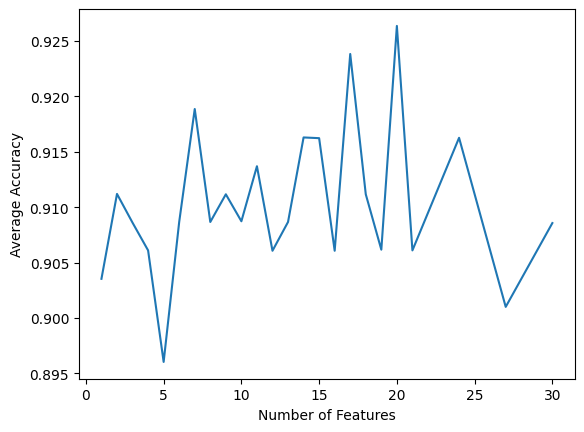

Selected features:  ['x9' 'x10' 'x11' 'x12' 'x62' 'x65' 'x66' 'x75' 'x76' 'x77' 'x78' 'x87'
 'x88' 'x89' 'x90' 'x91' 'x92' 'x114' 'x120' 'x121']


SVC()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

# Select features
fselection = SelectKBest(f_classif, k=80)
fselection.fit(x, y)
print("Selected features: ", fselection.get_feature_names_out())

#usamos RBF SVM que fue nuestro mejor modelo de clasificacion
clf = SVC(kernel='rbf')
x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)

# Evaluate model using cross-validation
cv_y_test = []
cv_y_pred = []
kf = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(x, y):
    # Training phase
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]

#usamos RBF SVM que fue nuestro mejor modelo de clasificacion

    clf_cv = SVC(kernel='rbf')
    fselection_cv = SelectKBest(f_classif, k=6)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)
    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = fselection_cv.transform(x.iloc[test_index])
    y_test = y.iloc[test_index]
    y_pred = clf_cv.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))
################################################################################
################################################################################
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,24,27,30]
acc_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(x, y):
        # Training phase
        x_train = x.iloc[train_index]
        y_train = y.iloc[train_index]
        clf_cv = SVC(kernel='rbf')
        fselection_cv = SelectKBest(f_classif, k=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)
        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x.iloc[test_index])
        y_test = y.iloc[test_index]
        y_pred = clf_cv.predict(x_test)
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)
    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print('Optimal number of features: ', opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("Number of Features")
plt.ylabel("Average Accuracy")
plt.show()

# Fit model with optimal number of features
clf = SVC(kernel='rbf')
fselection = SelectKBest(f_classif, k=opt_features)
fselection.fit(x, y)
print("Selected features: ", fselection.get_feature_names_out())
x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)



In [ ]:
df.head()

## 5. Repite el paso anterior, pero para un método de selección de características de tipo Wrapper.


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
# Reduce number of features to the half
################################################################################
print("----- Feature selection using 50% of predictors -----")
x = df.iloc[:, 1:]  # Reset x to include all features
y = df.iloc[:, 0]

# Set the desired sample size (e.g., 20% of the data)
sample_size = int(0.2 * len(x))  # Use x for the length

# Randomly select indices for the sample
sample_indices = np.random.choice(len(x), size=sample_size, replace=False)

# Create the sample dataset
x = x.iloc[sample_indices]  # Use x for selecting samples
y = y.iloc[sample_indices]  # Use y for selecting labels

# Select features
clf_cv = SVC(kernel = 'linear') #usamos linear para correr el codigo más rapido
fselection = SequentialFeatureSelector(clf, n_features_to_select=0.1)
fselection.fit(x, y)
print("Selected features: ", fselection.get_feature_names_out())

# Fit model using the new data set
x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)

# Evaluate model using cross-validation
cv_y_test = []
cv_y_pred = []
kf = StratifiedKFold(n_splits=2, shuffle=True)
for train_index, test_index in kf.split(x, y):
    # Training phase
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    clf_cv = SVC(kernel = 'linear')
    fselection_cv = SequentialFeatureSelector(clf_cv, n_features_to_select=0.1)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)
    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = fselection_cv.transform(x.iloc[test_index])
    y_test = y.iloc[test_index]
    y_pred = clf_cv.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


----- Feature selection using 50% of predictors -----
Selected features:  ['x0' 'x2' 'x5' 'x8' 'x10' 'x11' 'x12' 'x17' 'x42' 'x46' 'x48' 'x77' 'x86'
 'x87' 'x102']
              precision    recall  f1-score   support

         1.0       0.64      0.38      0.47        48
         2.0       0.92      0.97      0.94       346

    accuracy                           0.90       394
   macro avg       0.78      0.67      0.71       394
weighted avg       0.88      0.90      0.89       394



----- Optimal selection of number of features -----
---- n features = 1
---- n features = 2
---- n features = 3
---- n features = 4
---- n features = 5
---- n features = 6
---- n features = 7
---- n features = 8
---- n features = 9
---- n features = 10
---- n features = 50
---- n features = 100
---- n features = 150
Optimal number of features:  10


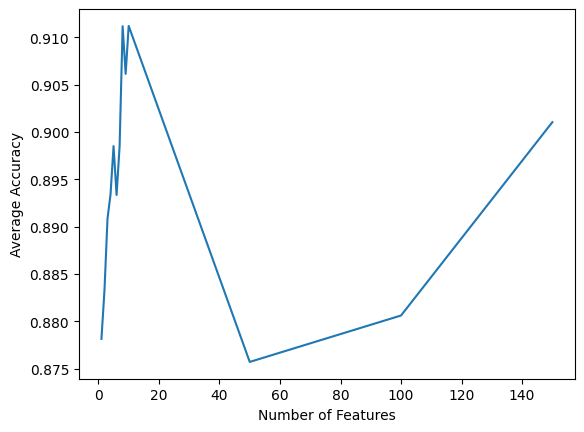

Selected features:  ['x9' 'x10' 'x11' 'x12' 'x76' 'x77' 'x88' 'x89' 'x90' 'x91']


SVC(kernel='linear')

In [ ]:
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100, 150]
acc_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(x, y):
        # Training phase
        x_train = x.iloc[train_index]
        y_train = y.iloc[train_index]
        clf_cv = SVC(kernel = 'linear')
        fselection_cv = SelectKBest(f_classif, k=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)
        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x.iloc[test_index])
        y_test = y.iloc[test_index]
        y_pred = clf_cv.predict(x_test)
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print('Optimal number of features: ', opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("Number of Features")
plt.ylabel("Average Accuracy")
plt.show()

# Fit model with optimal number of features
clf_cv = SVC(kernel = 'linear')
fselection = SelectKBest(f_classif, k=opt_features)
fselection.fit(x, y)
print("Selected features: ", fselection.get_feature_names_out())
x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)


## 6. Repite el paso 4, pero para un método de selección de características de tipo Filter-Wrapper.


Selected features:  ['x1' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x13' 'x14' 'x15' 'x17' 'x18' 'x19'
 'x20' 'x21' 'x24' 'x28' 'x30' 'x33' 'x36' 'x37' 'x39' 'x40' 'x42' 'x44'
 'x48' 'x49' 'x50' 'x53' 'x54' 'x58' 'x60' 'x61' 'x62' 'x63' 'x65' 'x66'
 'x69' 'x70' 'x72' 'x73' 'x77' 'x82' 'x84' 'x85' 'x86' 'x93' 'x95' 'x98'
 'x101' 'x103' 'x107' 'x108' 'x109' 'x110' 'x111' 'x113' 'x114' 'x115'
 'x116' 'x118' 'x121' 'x122' 'x123' 'x124' 'x126' 'x127' 'x128' 'x130'
 'x137' 'x138' 'x139' 'x147' 'x148' 'x150' 'x152']
              precision    recall  f1-score   support

         1.0       0.53      0.52      0.53        48
         2.0       0.93      0.94      0.94       346

    accuracy                           0.89       394
   macro avg       0.73      0.73      0.73       394
weighted avg       0.88      0.89      0.89       394

----- Optimal selection of number of features -----
---- n features = 1
ACC: 0.8756572541382667
---- n features = 2
ACC: 0.8832521908471275
---- n features = 3
ACC: 0.

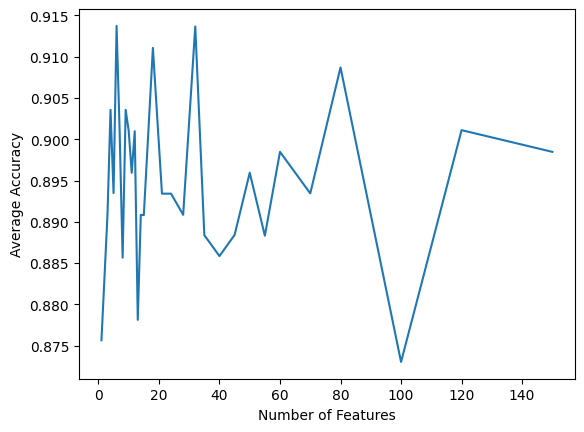

Selected features:  ['x10' 'x14' 'x49' 'x50' 'x114' 'x122']


SVC(kernel='linear')

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import RFE

# Select features
clf = SVC(kernel = 'linear')
fselection = RFE(clf, n_features_to_select = 0.5)
fselection.fit(x, y)
print("Selected features: ", fselection.get_feature_names_out())

# Fit model using the new data set
x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)
# Evaluate model using cross validation
cv_y_test = []
cv_y_pred = []
kf = StratifiedKFold(n_splits=5, shuffle = True)

for train_index, test_index in kf.split(x, y):
    # Training phase
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]

#usamos RBF SVM que fue nuestro mejor modelo de clasificacion

    clf_cv = SVC(kernel = 'linear')
    fselection_cv = RFE(clf_cv, n_features_to_select=0.5)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)
    clf_cv.fit(x_train, y_train)


    # Test phase
    x_test = fselection_cv.transform(x.iloc[test_index])
    y_test = y.iloc[test_index]
    y_pred = clf_cv.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))
################################################################################
################################################################################
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 21, 24, 28, 32, 35, 40,45, 50,55, 60,70, 80,100,120,150]
acc_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(x, y):
        # Training phase
        x_train = x.iloc[train_index]
        y_train = y.iloc[train_index]
        clf_cv = SVC(kernel = 'linear')

        fselection_cv = RFE(clf_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)
        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x.iloc[test_index])
        y_test = y.iloc[test_index]
        y_pred = clf_cv.predict(x_test)
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)
    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print('Optimal number of features: ', opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("Number of Features")
plt.ylabel("Average Accuracy")
plt.show()

# Fit model with optimal number of features
clf = SVC(kernel='linear')
fselection = RFE(clf, n_features_to_select = opt_features)
fselection.fit(x, y)
print("Selected features: ", fselection.get_feature_names_out())
x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)

## 7. Escoge alguna de las técnicas de selección de características que probaste con anteioridad, y con el número óptimo de características encontrado, prepara tu modelo para producción haciendo lo siguiente:
Aplica el método de selección de características con todos los datos.
Ajusta el modelo con las características encontradas.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif


x = df.iloc[:, 1:]  # Reset x to include all features
y = df.iloc[:, 0]

# Select features
fselection = SelectKBest(f_classif, k=20)
fselection.fit(x, y)
print("Selected features: ", fselection.get_feature_names_out())

#usamos RBF SVM que fue nuestro mejor modelo de clasificacion
clf = SVC(kernel='rbf')
x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)

# Evaluate model using cross-validation
cv_y_test = []
cv_y_pred = []
kf = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(x, y):
    # Training phase
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]

#usamos RBF SVM que fue nuestro mejor modelo de clasificacion

    clf_cv = SVC(kernel='rbf')
    fselection_cv = SelectKBest(f_classif, k=6)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)
    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = fselection_cv.transform(x.iloc[test_index])
    y_test = y.iloc[test_index]
    y_pred = clf_cv.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


# Aplicar el Método de Selección de Características con Todos los Datos:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]
fselection = SelectKBest(f_classif, k=20)
fselection.fit(x, y)
#Ajustar el Modelo con las Características Encontradas
X_selected = fselection.transform(x)
clf = SVC(kernel='rbf')
clf.fit(X_selected, y)

Selected features:  ['x8' 'x9' 'x10' 'x11' 'x65' 'x66' 'x74' 'x75' 'x76' 'x77' 'x78' 'x79'
 'x86' 'x87' 'x88' 'x89' 'x90' 'x91' 'x121' 'x122']
              precision    recall  f1-score   support

         1.0       0.81      0.41      0.54       281
         2.0       0.91      0.98      0.94      1689

    accuracy                           0.90      1970
   macro avg       0.86      0.69      0.74      1970
weighted avg       0.89      0.90      0.89      1970



SVC()

**¿Qué pasa si no se considera el problema de tener datos desbalanceados para este caso? ¿Por qué?**
En este caso no pasaría nada porque lo primero que hicimos fue analizar si estaban desbalanceado los datos. Al comparar el accuracy de un modelo con los datos originales, y con los datos balanceados usando Upsampling, weighted loss function, y Subsampling, vimos que el modelo no mejoraba si balanceabamos los datos, llegando a la conclusión que los datos no eran una muestra desbalanceada.

**De todos los clasificadores, ¿cuál o cuales consideras que son adecuados para los datos? ¿Qué propiedades tienen dichos modelos que los hacen apropiados para los datos? Argumenta tu respuesta.**
El peor clasificador fue, como era de esperar, el de regresión lineal. Esto es porque no existe una relación lineal entre las variables independientes  y la variable dependiente. Los mejores clasificadores fueron el linear SVM y el RBF SVM. De estos dos yo me iría por el linear SVM, que ha pesar de ser minimamente peor que el RBF, es mas eficiente y menos costoso.

**¿Es posibles reducir la dimensionalidad del problema sin perder rendimiento en el modelo? ¿Por qué?**

Si es posible, y lo intentamos en los pasos 4-6 usando metodos como Filter, wrapper, y filter-wrapper. Esto es porque en muchos conjuntos de datos, algunas características pueden no estar relacionadas con la variable objetivo o pueden ser redundantes. Eliminar estas características no informativas puede simplificar el modelo sin afectar su capacidad de predicción. Incluso teniendo menos caracteristicas y eliminar las que son redundantes o poco informativas, puedes mejorar el modeloy hacerlos mas facil de interpretar y visualizar.

**¿Qué método de selección de características consideras el más adecuado para este caso? ¿Por qué?**
Comparando el rendimiento de los 3, creo que el mejor fue el de filter dado que nos dios un buen rendimiento y lo más importante es que como estamos trabajando con muchas variables, el enfoque "filter" tiende a ser más eficiente computacionalmente en comparación con los métodos "wrapper", ya que no implica entrenar repetidamente un modelo de aprendizaje automático. Para ser mas eficiente y manteniendo un buen nivel "filter" es adecuado, de acuerdo a los datos con los que estamos trabajando

**Si quisieras mejorar el rendimiento de tus modelos, ¿qué más se podría hacer?**

para mejorar el rendimiento podemos asegurarnos que los hiperparámetros del modelo estén optimizados. Podemos utilizar técnicas como la búsqueda de hiperparámetros con GridSearchCV para encontrar la combinación óptima de hiperparámetros que maximice el rendimiento del modelo. También pudieramos usar algo como Ensemble learning, métodos de ensamblado de modelos como Random Forest, Gradient Boosting, o AdaBoost. Los ensamblados pueden combinar múltiples modelos para mejorar la precisión general y reducir el sobreajuste.